## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  13.759439  1374.596950  0.695721   7.459022   956.302023
1  60.835615   823.499283  0.445413  10.616979   371.771604
2  95.996021   449.600020  0.619648   3.590046   294.776726
3  48.866518  1758.041659  0.707049   2.426053  1243.988839
4  89.446483  1708.556797  0.799125   3.870140  1368.341439


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9603464	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9514008	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9408360	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9326872	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9202467	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9109492	total: 60.3ms	remaining: 9.99s
6:	learn: 0.8995530	total: 61ms	remaining: 8.65s
7:	learn: 0.8875776	total: 61.4ms	remaining: 7.62s
8:	learn: 0.8756389	total: 61.8ms	remaining: 6.81s
9:	learn: 0.8640341	total: 62.3ms	remaining: 6.17s
10:	learn: 0.8522954	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8397657	total: 63ms	remaining: 5.19s
12:	learn: 0.8266063	total: 63.4ms	remaining: 4.82s
13:	learn: 0.8144851	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8029594	total: 64.3ms	remaining: 4.22s
15:	learn: 0.7940996	total: 64.8ms	remaining: 3.98s
16:	learn: 0.7817267	total: 65.1ms	remaining: 3.76s
17:	learn: 0.7743348	total: 65.5ms	remaining: 3.57s
18:	learn: 0.7665653	total: 65.9ms	remaining: 3.4

116:	learn: 0.2494694	total: 106ms	remaining: 803ms
117:	learn: 0.2464934	total: 107ms	remaining: 799ms
118:	learn: 0.2438898	total: 107ms	remaining: 794ms
119:	learn: 0.2416030	total: 108ms	remaining: 789ms
120:	learn: 0.2387924	total: 108ms	remaining: 785ms
121:	learn: 0.2354481	total: 108ms	remaining: 780ms
122:	learn: 0.2336083	total: 109ms	remaining: 776ms
123:	learn: 0.2309645	total: 109ms	remaining: 772ms
124:	learn: 0.2290290	total: 110ms	remaining: 768ms
125:	learn: 0.2263610	total: 110ms	remaining: 763ms
126:	learn: 0.2236764	total: 110ms	remaining: 759ms
127:	learn: 0.2216313	total: 111ms	remaining: 755ms
128:	learn: 0.2194848	total: 111ms	remaining: 751ms
129:	learn: 0.2175700	total: 112ms	remaining: 748ms
130:	learn: 0.2155163	total: 112ms	remaining: 745ms
131:	learn: 0.2134524	total: 113ms	remaining: 741ms
132:	learn: 0.2113534	total: 113ms	remaining: 737ms
133:	learn: 0.2095685	total: 113ms	remaining: 732ms
134:	learn: 0.2074490	total: 114ms	remaining: 729ms
135:	learn: 

296:	learn: 0.0614025	total: 185ms	remaining: 438ms
297:	learn: 0.0610091	total: 186ms	remaining: 437ms
298:	learn: 0.0608590	total: 186ms	remaining: 436ms
299:	learn: 0.0606731	total: 186ms	remaining: 435ms
300:	learn: 0.0602745	total: 187ms	remaining: 434ms
301:	learn: 0.0599946	total: 187ms	remaining: 433ms
302:	learn: 0.0597340	total: 188ms	remaining: 432ms
303:	learn: 0.0595965	total: 188ms	remaining: 430ms
304:	learn: 0.0593493	total: 188ms	remaining: 429ms
305:	learn: 0.0591867	total: 189ms	remaining: 428ms
306:	learn: 0.0588912	total: 189ms	remaining: 427ms
307:	learn: 0.0587094	total: 190ms	remaining: 426ms
308:	learn: 0.0582778	total: 190ms	remaining: 425ms
309:	learn: 0.0581229	total: 191ms	remaining: 424ms
310:	learn: 0.0580005	total: 191ms	remaining: 423ms
311:	learn: 0.0578489	total: 191ms	remaining: 422ms
312:	learn: 0.0577290	total: 192ms	remaining: 420ms
313:	learn: 0.0575576	total: 192ms	remaining: 419ms
314:	learn: 0.0573887	total: 192ms	remaining: 418ms
315:	learn: 

527:	learn: 0.0264685	total: 288ms	remaining: 258ms
528:	learn: 0.0263527	total: 289ms	remaining: 257ms
529:	learn: 0.0262529	total: 289ms	remaining: 256ms
530:	learn: 0.0261391	total: 290ms	remaining: 256ms
531:	learn: 0.0260271	total: 290ms	remaining: 255ms
532:	learn: 0.0258995	total: 291ms	remaining: 255ms
533:	learn: 0.0258032	total: 291ms	remaining: 254ms
534:	learn: 0.0256699	total: 291ms	remaining: 253ms
535:	learn: 0.0256012	total: 292ms	remaining: 252ms
536:	learn: 0.0254935	total: 292ms	remaining: 252ms
537:	learn: 0.0253723	total: 292ms	remaining: 251ms
538:	learn: 0.0252643	total: 293ms	remaining: 250ms
539:	learn: 0.0251556	total: 293ms	remaining: 250ms
540:	learn: 0.0250897	total: 294ms	remaining: 249ms
541:	learn: 0.0249629	total: 294ms	remaining: 249ms
542:	learn: 0.0248505	total: 295ms	remaining: 248ms
543:	learn: 0.0247484	total: 295ms	remaining: 247ms
544:	learn: 0.0246736	total: 296ms	remaining: 247ms
545:	learn: 0.0245733	total: 296ms	remaining: 246ms
546:	learn: 

703:	learn: 0.0122204	total: 367ms	remaining: 154ms
704:	learn: 0.0121559	total: 368ms	remaining: 154ms
705:	learn: 0.0120926	total: 368ms	remaining: 153ms
706:	learn: 0.0120473	total: 368ms	remaining: 153ms
707:	learn: 0.0120057	total: 369ms	remaining: 152ms
708:	learn: 0.0119437	total: 369ms	remaining: 151ms
709:	learn: 0.0118805	total: 369ms	remaining: 151ms
710:	learn: 0.0118282	total: 370ms	remaining: 150ms
711:	learn: 0.0117613	total: 370ms	remaining: 150ms
712:	learn: 0.0117140	total: 371ms	remaining: 149ms
713:	learn: 0.0116735	total: 371ms	remaining: 149ms
714:	learn: 0.0116270	total: 371ms	remaining: 148ms
715:	learn: 0.0115873	total: 372ms	remaining: 148ms
716:	learn: 0.0115416	total: 372ms	remaining: 147ms
717:	learn: 0.0114915	total: 373ms	remaining: 146ms
718:	learn: 0.0114313	total: 373ms	remaining: 146ms
719:	learn: 0.0113639	total: 374ms	remaining: 145ms
720:	learn: 0.0113149	total: 374ms	remaining: 145ms
721:	learn: 0.0112658	total: 374ms	remaining: 144ms
722:	learn: 

925:	learn: 0.0053104	total: 470ms	remaining: 37.5ms
926:	learn: 0.0052884	total: 470ms	remaining: 37ms
927:	learn: 0.0052645	total: 471ms	remaining: 36.5ms
928:	learn: 0.0052411	total: 471ms	remaining: 36ms
929:	learn: 0.0052196	total: 472ms	remaining: 35.5ms
930:	learn: 0.0052051	total: 472ms	remaining: 35ms
931:	learn: 0.0051824	total: 473ms	remaining: 34.5ms
932:	learn: 0.0051673	total: 473ms	remaining: 34ms
933:	learn: 0.0051532	total: 474ms	remaining: 33.5ms
934:	learn: 0.0051305	total: 474ms	remaining: 33ms
935:	learn: 0.0051097	total: 475ms	remaining: 32.5ms
936:	learn: 0.0051023	total: 475ms	remaining: 31.9ms
937:	learn: 0.0050795	total: 476ms	remaining: 31.4ms
938:	learn: 0.0050603	total: 476ms	remaining: 30.9ms
939:	learn: 0.0050442	total: 476ms	remaining: 30.4ms
940:	learn: 0.0050278	total: 477ms	remaining: 29.9ms
941:	learn: 0.0050029	total: 477ms	remaining: 29.4ms
942:	learn: 0.0049838	total: 478ms	remaining: 28.9ms
943:	learn: 0.0049767	total: 478ms	remaining: 28.4ms
944

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

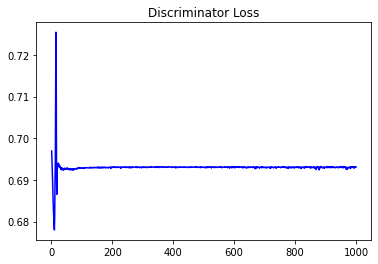

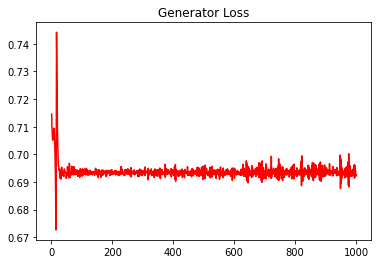

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.009182705563744871


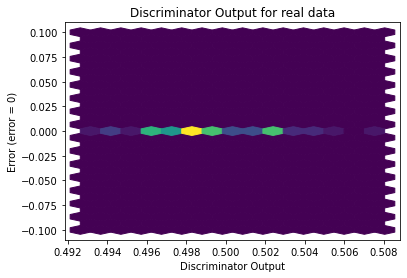

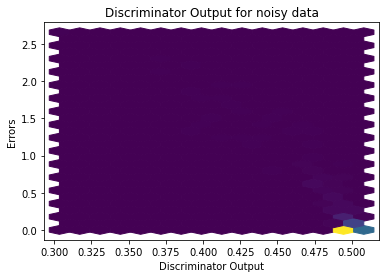

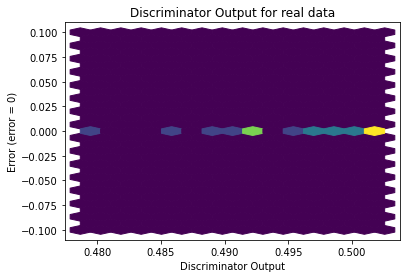

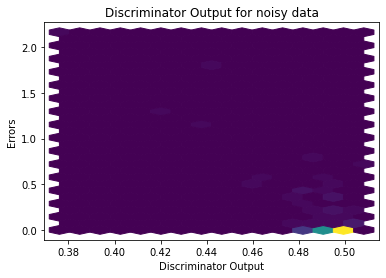

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


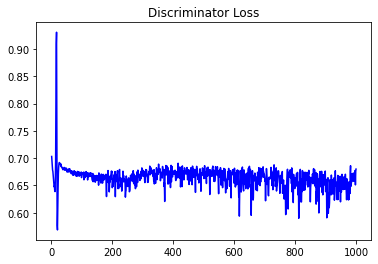

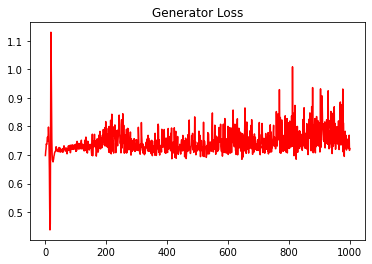

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.00692103662817952


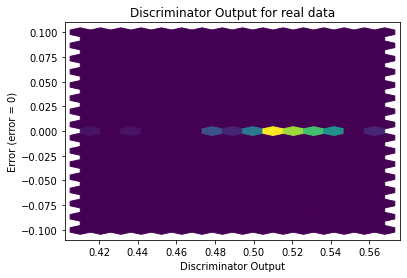

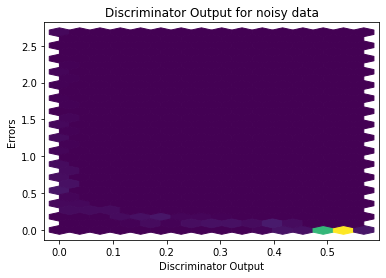

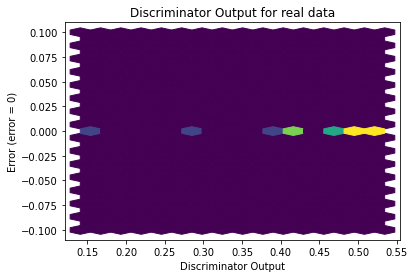

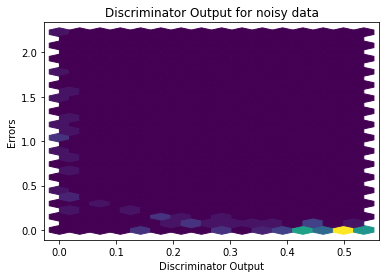

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0960]], requires_grad=True)
